In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import warnings

# Notebook display settings
%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

RANDOM_STATE = 42


Shape: (200, 5)

-- head --
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

-- info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

-- describ

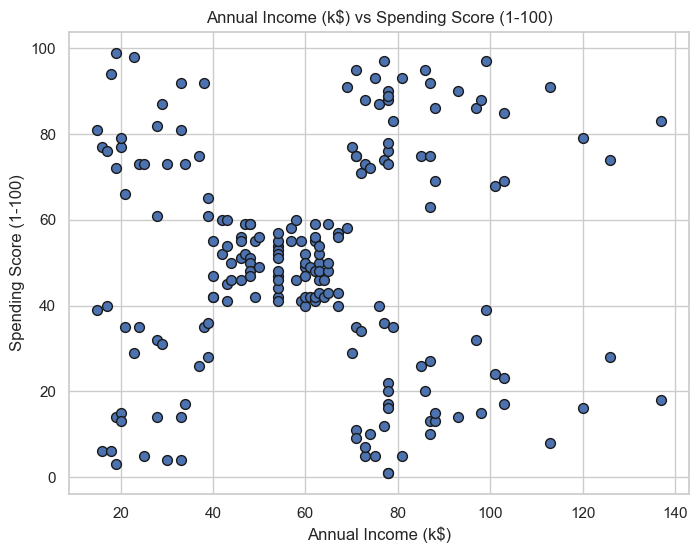

In [13]:
# Load dataset
DATA_PATH = 'Mall_Customers.csv'
df = pd.read_csv(DATA_PATH)

# Basic exploration
print("Shape:", df.shape)
print('\n-- head --')
print(df.head())
print('\n-- info --')
print(df.info())
print('\n-- describe --')
print(df.describe())

# %%
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
X_values = X.values  # numpy array used by sklearn

# %%
# Initial scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_values[:, 0], X_values[:, 1], s=50, edgecolor='k')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

 K-Means Clustering
1. Use the Elbow Method to find optimal `k` (1..10)
2. Fit KMeans with the chosen `k`
3. Visualize clusters and centroids

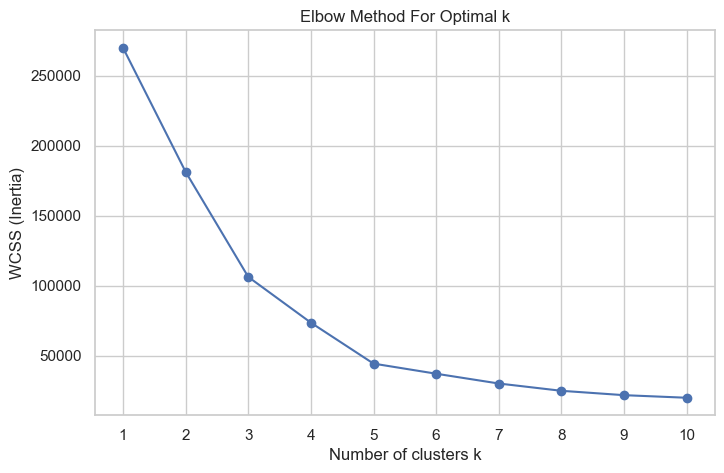

In [15]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    km.fit(X_values)
    wcss.append(km.inertia_)

# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xticks(K_range)
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [16]:
k_optimal = 5

kmeans = KMeans(n_clusters=k_optimal, random_state=RANDOM_STATE, n_init=10)
kmeans_labels = kmeans.fit_predict(X_values)
centroids = kmeans.cluster_centers_


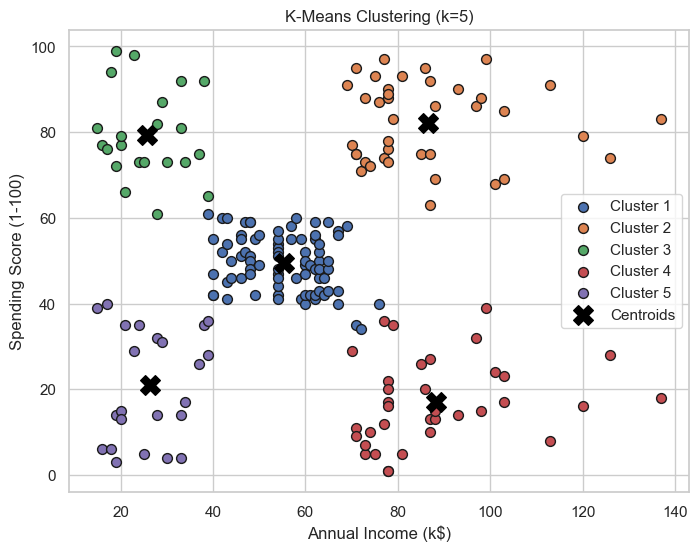

In [17]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette('tab10', n_colors=k_optimal)
for i in range(k_optimal):
    plt.scatter(X_values[kmeans_labels == i, 0], X_values[kmeans_labels == i, 1],
                s=50, label=f'Cluster {i+1}', edgecolor='k')
# plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='black', label='Centroids')
plt.title(f'K-Means Clustering (k={k_optimal})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Agglomerative Hierarchical Clustering
1. Create a dendrogram (Ward linkage recommended)
2. Choose the number of clusters from the dendrogram
3. Fit AgglomerativeClustering and visualize results

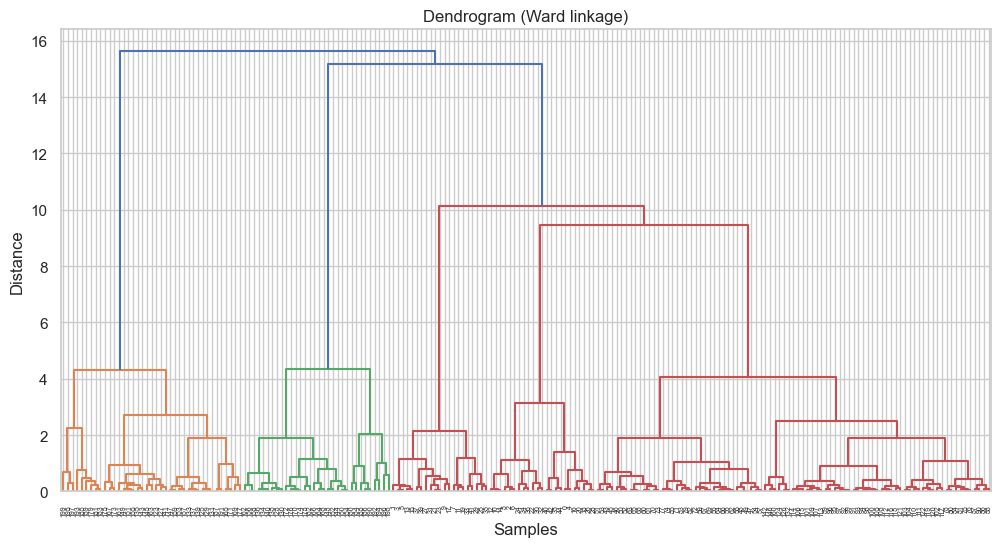

In [18]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


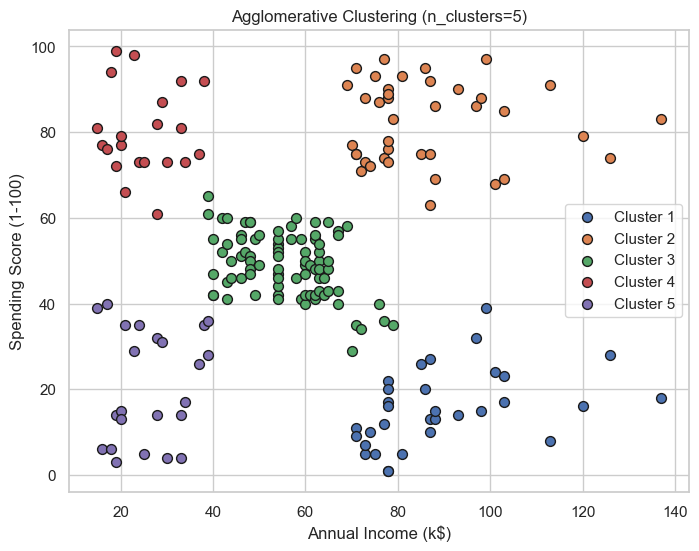

In [19]:
n_clusters_h = 5
agg = AgglomerativeClustering(n_clusters=n_clusters_h, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

# %%
# Visualize hierarchical clustering results
plt.figure(figsize=(8, 6))
palette = sns.color_palette('tab10', n_colors=n_clusters_h)
for i in range(n_clusters_h):
    plt.scatter(X_values[agg_labels == i, 0], X_values[agg_labels == i, 1],
                s=50, label=f'Cluster {i+1}', edgecolor='k')
plt.title(f'Agglomerative Clustering (n_clusters={n_clusters_h})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Part 4: DBSCAN Clustering
1. Experiment with eps and min_samples
2. Fit DBSCAN and visualize the results

In [20]:
 
dbscan = DBSCAN(eps=5, min_samples=5)
db_labels = dbscan.fit_predict(X_values)

# Count unique cluster labels (including -1 for noise)
unique_labels = np.unique(db_labels)
print('DBSCAN labels found:', unique_labels)

DBSCAN labels found: [-1  0  1  2  3  4]


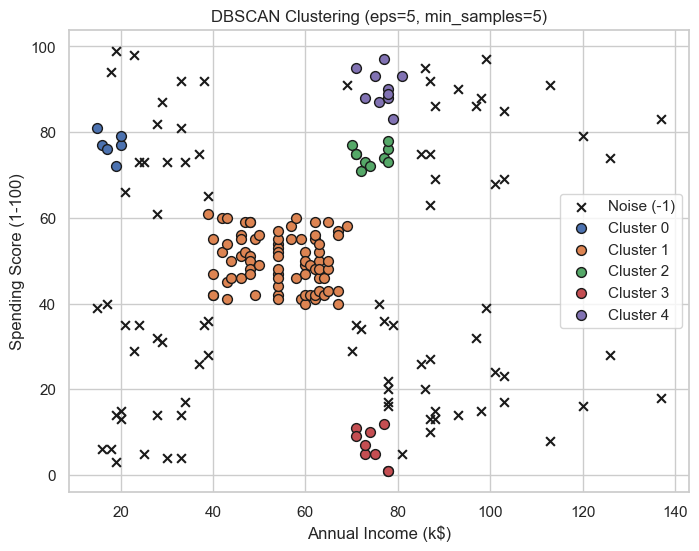

In [21]:
# Visualize DBSCAN results
plt.figure(figsize=(8, 6))
colors = sns.color_palette('tab10', n_colors=max(1, len(unique_labels)))
for lbl in unique_labels:
    if lbl == -1:
        # noise
        plt.scatter(X_values[db_labels == lbl, 0], X_values[db_labels == lbl, 1],
                    s=40, c='k', marker='x', label='Noise (-1)')
    else:
        plt.scatter(X_values[db_labels == lbl, 0], X_values[db_labels == lbl, 1],
                    s=50, label=f'Cluster {lbl}', edgecolor='k')
plt.title('DBSCAN Clustering (eps=5, min_samples=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [22]:
# Attach labels and save to CSV
df_out = df.copy()
df_out['KMeans_Cluster'] = kmeans_labels
df_out['Agglomerative_Cluster'] = agg_labels
df_out['DBSCAN_Cluster'] = db_labels

df_out.to_csv("Mall_Customers_Clustered.csv", index=False)
print('Saved clustered data to')

Saved clustered data to
